In [45]:
#Those functions are used to try NN with numbers i wrote

import matplotlib.pyplot as plt
import numpy as np

def reduce(wanted,image):

    
    c1=image.shape[0]//wanted
    c2=image.shape[1]//wanted
    
    y = np.zeros((wanted, wanted, 3))
    for i in range(0,wanted):
        for j in range(0,wanted):
            r1=0
            r2=0
            r3=0
            for k in range(c1):
                for l in range(c2):
                    r1=r1+img[i*c1+k][j*c2+l][0]
                    r2=r2+img[i*c1+k][j*c2+l][1]
                    r3=r1+img[i*c1+k][j*c2+l][2]
            reduc=c1*c2
                    
            y[i,j,0]=r1//reduc
            y[i,j,1]=r2//reduc
            y[i,j,2]=r3//reduc
            
    return(y)
            
def gray(img):
    y=np.zeros((28,28))
    for a in range(28):
        for b in range(28):
            y[a][b]=img[a][b][0]+img[a][b][1]+img[a][b][2]
        
        
        
    return(y.reshape(28*28))
                        
            
def encode(a):
    l=[]
    for i in range(10):
        if a==i:
            l.append(1)
        else:
            l.append(0)
            
    return(l)            
    

In [46]:
from __future__ import print_function

# Import MNIST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

import tensorflow as tf

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [47]:
# Parameters
learning_rate = 0.01
num_steps = 1000
batch_size = 128
display_step = 10

# Network Parameters
n_hidden_1 = 512 
n_hidden_2 = 512 
n_hidden_3 = 512 

num_input = 784 # MNIST data input (img shape: 28*28)

num_classes = 10 # MNIST total classes (0-9 digits)


X = tf.placeholder("float", [None, num_input])
Y = tf.placeholder("float", [None, num_classes])



In [48]:
weights = {
    'h1': tf.Variable(tf.random_normal([num_input, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'h3': tf.Variable(tf.random_normal([n_hidden_2, n_hidden_3])),
    'out': tf.Variable(tf.random_normal([n_hidden_3, num_classes]))
}
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'b3': tf.Variable(tf.random_normal([n_hidden_3])),
    'out': tf.Variable(tf.random_normal([num_classes]))
}



In [49]:
weights

{'h1': <tf.Variable 'Variable_40:0' shape=(784, 512) dtype=float32_ref>,
 'h2': <tf.Variable 'Variable_41:0' shape=(512, 512) dtype=float32_ref>,
 'h3': <tf.Variable 'Variable_42:0' shape=(512, 512) dtype=float32_ref>,
 'out': <tf.Variable 'Variable_43:0' shape=(512, 10) dtype=float32_ref>}

In [50]:
biases

{'b1': <tf.Variable 'Variable_44:0' shape=(512,) dtype=float32_ref>,
 'b2': <tf.Variable 'Variable_45:0' shape=(512,) dtype=float32_ref>,
 'b3': <tf.Variable 'Variable_46:0' shape=(512,) dtype=float32_ref>,
 'out': <tf.Variable 'Variable_47:0' shape=(10,) dtype=float32_ref>}

In [51]:
# Create model
def neural_net(x):
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_3 = tf.add(tf.matmul(layer_2, weights['h3']), biases['b3'])
    out_layer = tf.matmul(layer_3, weights['out']) + biases['out']
    return out_layer



In [52]:
logits = neural_net(X)

loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
    logits=logits, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
train_op = optimizer.minimize(loss_op)

correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

init = tf.global_variables_initializer()

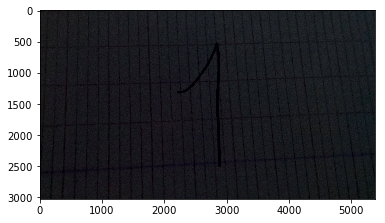

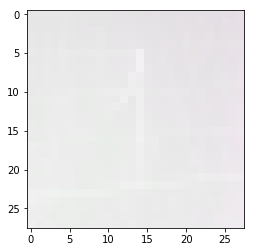

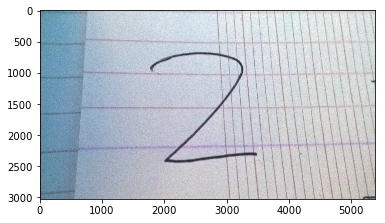

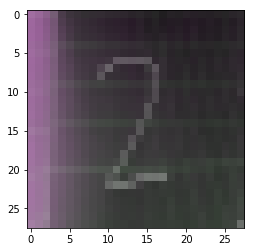

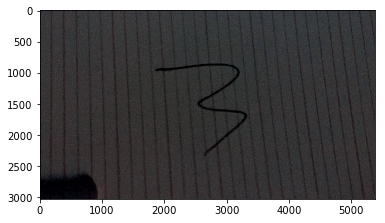

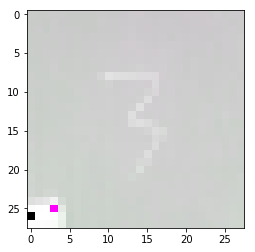

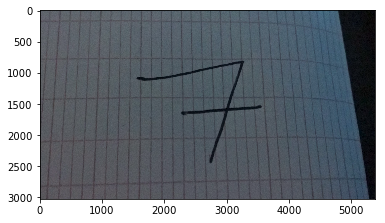

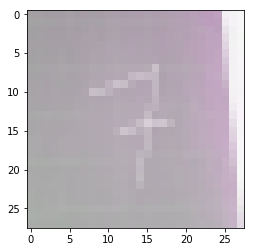

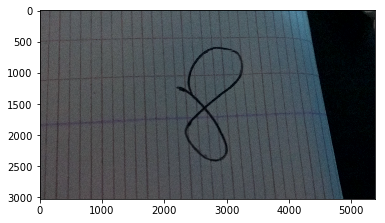

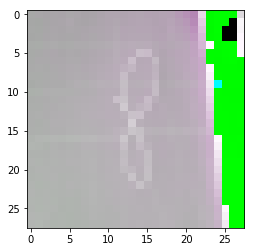

In [35]:
import cv2
import numpy as np
liste_test=[]
liste_label=[]
for num in ['1','2','3','7','8']:

    url="C:\\Users\\jean-\\Desktop\\IMG\\mnist\\" + num + ".jpg"
    img = cv2.imread(url)
    plt.imshow(img)
    plt.show()
    a=reduce(28,img)
    plt.imshow(a)
    plt.show()
    liste_test.append(gray(a))
    liste_label.append(encode(int(num)))
    
 
    

In [53]:
# Start training
l1=[]
with tf.Session() as sess:

    # Run the initializer
    sess.run(init)

    for step in range(1, num_steps+1):
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        # Run optimization op (backprop)
        sess.run(train_op, feed_dict={X: batch_x, Y: batch_y})
        if step % display_step == 0 or step == 1:
            # Calculate batch loss and accuracy
            loss, acc = sess.run([loss_op, accuracy], feed_dict={X: batch_x,
                                                                 Y: batch_y})
            print("Step " + str(step) + ", Minibatch Loss= " + \
                  "{:.4f}".format(loss) + ", Training Accuracy= " + \
                  "{:.3f}".format(acc))
            
            l1.append([step,acc])

    print("Optimization Finished!")

    # Calculate accuracy for MNIST test images
    print("Testing Accuracy:", \
        sess.run(accuracy, feed_dict={X: mnist.test.images,
                                      Y: mnist.test.labels}))

    print("WAIT")
    
    print("Testing Accuracy:", \
        sess.run(accuracy, feed_dict={X: np.array(liste_test).reshape(5,784),
                                      Y: np.array(liste_label).reshape(5,10)
                                     }))

Step 1, Minibatch Loss= 143104.1719, Training Accuracy= 0.312
Step 10, Minibatch Loss= 33033.9336, Training Accuracy= 0.781
Step 20, Minibatch Loss= 24947.0430, Training Accuracy= 0.805
Step 30, Minibatch Loss= 16216.1191, Training Accuracy= 0.852
Step 40, Minibatch Loss= 17424.6914, Training Accuracy= 0.852
Step 50, Minibatch Loss= 6709.0649, Training Accuracy= 0.945
Step 60, Minibatch Loss= 8223.8203, Training Accuracy= 0.898
Step 70, Minibatch Loss= 22581.7324, Training Accuracy= 0.852
Step 80, Minibatch Loss= 3640.8892, Training Accuracy= 0.891
Step 90, Minibatch Loss= 9911.9619, Training Accuracy= 0.836
Step 100, Minibatch Loss= 14016.8770, Training Accuracy= 0.852
Step 110, Minibatch Loss= 17653.8281, Training Accuracy= 0.812
Step 120, Minibatch Loss= 5432.7246, Training Accuracy= 0.930
Step 130, Minibatch Loss= 11848.7520, Training Accuracy= 0.820
Step 140, Minibatch Loss= 13084.7910, Training Accuracy= 0.820
Step 150, Minibatch Loss= 15363.4766, Training Accuracy= 0.867
Step 16

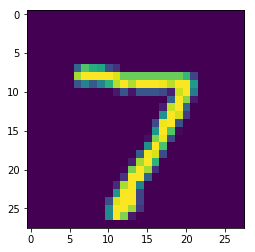

In [21]:
plt.imshow(mnist.test.images[0].reshape((28,28)))
plt.show()

In [54]:
# Training Parameters
learning_rate = 0.001
num_steps = 1000
batch_size = 128
display_step = 10

# Network Parameters
num_input = 784 # MNIST data input (img shape: 28*28)
num_classes = 10 # MNIST total classes (0-9 digits)
dropout = 0.75 # Dropout, to avoid overfitting

# tf Graph input
X = tf.placeholder(tf.float32, [None, num_input])
Y = tf.placeholder(tf.float32, [None, num_classes])
keep_prob = tf.placeholder(tf.float32) # dropout (keep probability)



In [55]:
# Create some wrappers for simplicity
def conv2d(x, W, b, strides=1):
    # Conv2D wrapper, with bias and relu activation
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding='SAME')
    x = tf.nn.bias_add(x, b)
    return tf.nn.relu(x)


def maxpool2d(x, k=2):
    
    return tf.nn.max_pool(x, ksize=[1, k, k, 1], strides=[1, k, k, 1],
                          padding='SAME')


# Create model
def conv_net(x, weights, biases, dropout):

    x = tf.reshape(x, shape=[-1, 28, 28, 1])

    conv1 = conv2d(x, weights['wc1'], biases['bc1'])

    conv1 = maxpool2d(conv1, k=2)


    conv2 = conv2d(conv1, weights['wc2'], biases['bc2'])

    conv2 = maxpool2d(conv2, k=2)


    fc1 = tf.reshape(conv2, [-1, weights['wd1'].get_shape().as_list()[0]])
    fc1 = tf.add(tf.matmul(fc1, weights['wd1']), biases['bd1'])
    fc1 = tf.nn.relu(fc1)

    fc1 = tf.nn.dropout(fc1, dropout)


    out = tf.add(tf.matmul(fc1, weights['out']), biases['out'])
    return out

In [56]:
# Store layers weight & bias
weights = {
    # 5x5 conv, 1 input, 32 outputs
    'wc1': tf.Variable(tf.random_normal([5, 5, 1, 32])),
    # 5x5 conv, 32 inputs, 64 outputs
    'wc2': tf.Variable(tf.random_normal([5, 5, 32, 64])),
    # fully connected, 7*7*64 inputs, 1024 outputs
    'wd1': tf.Variable(tf.random_normal([7*7*64, 1024])),
    # 1024 inputs, 10 outputs (class prediction)
    'out': tf.Variable(tf.random_normal([1024, num_classes]))
}

biases = {
    'bc1': tf.Variable(tf.random_normal([32])),
    'bc2': tf.Variable(tf.random_normal([64])),
    'bd1': tf.Variable(tf.random_normal([1024])),
    'out': tf.Variable(tf.random_normal([num_classes]))
}

# Construct model
logits = conv_net(X, weights, biases, keep_prob)
prediction = tf.nn.softmax(logits)

# Define loss and optimizer
loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
    logits=logits, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
train_op = optimizer.minimize(loss_op)


# Evaluate model
correct_pred = tf.equal(tf.argmax(prediction, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

In [57]:
# Start training
l2=[]
with tf.Session() as sess:

    # Run the initializer
    sess.run(init)

    for step in range(1, num_steps+1):
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        # Run optimization op (backprop)
        sess.run(train_op, feed_dict={X: batch_x, Y: batch_y, keep_prob: dropout})
        if step % display_step == 0 or step == 1:
            # Calculate batch loss and accuracy
            loss, acc = sess.run([loss_op, accuracy], feed_dict={X: batch_x,
                                                                 Y: batch_y,
                                                                 keep_prob: 1.0})
            print("Step " + str(step) + ", Minibatch Loss= " + \
                  "{:.4f}".format(loss) + ", Training Accuracy= " + \
                  "{:.3f}".format(acc))
            l2.append([step,acc])

    print("Optimization Finished!")

    # Calculate accuracy for first 1000 MNIST test images
    print("Testing Accuracy:", \
        sess.run(accuracy, feed_dict={X: mnist.test.images[:1000],
                                      Y: mnist.test.labels[:1000],
                                      keep_prob: 1.0}))

Step 1, Minibatch Loss= 46676.0000, Training Accuracy= 0.125
Step 10, Minibatch Loss= 14892.5273, Training Accuracy= 0.383
Step 20, Minibatch Loss= 6689.6025, Training Accuracy= 0.617
Step 30, Minibatch Loss= 4018.6042, Training Accuracy= 0.727
Step 40, Minibatch Loss= 3514.5732, Training Accuracy= 0.812
Step 50, Minibatch Loss= 2834.9287, Training Accuracy= 0.875
Step 60, Minibatch Loss= 3788.0159, Training Accuracy= 0.805
Step 70, Minibatch Loss= 3262.1008, Training Accuracy= 0.820
Step 80, Minibatch Loss= 2426.0854, Training Accuracy= 0.859
Step 90, Minibatch Loss= 1843.8552, Training Accuracy= 0.859
Step 100, Minibatch Loss= 1935.3005, Training Accuracy= 0.906
Step 110, Minibatch Loss= 1420.3834, Training Accuracy= 0.922
Step 120, Minibatch Loss= 985.9781, Training Accuracy= 0.891
Step 130, Minibatch Loss= 1469.3971, Training Accuracy= 0.914
Step 140, Minibatch Loss= 681.4207, Training Accuracy= 0.930
Step 150, Minibatch Loss= 1506.6213, Training Accuracy= 0.891
Step 160, Minibatch

In [68]:
ll=[]
tt=[]
vv=[]
ww=[]
for i in range(len(l1)):
    ll.append(l1[i][0])
    tt.append(l1[i][1])
    vv.append(l2[i][0])
    ww.append(l2[i][1])

In [78]:
import pandas as pd
g1=pd.DataFrame({'ind':ll,'val':tt})
g1.set_index('ind')
g2=pd.DataFrame({'ind':vv,'val':ww})
g2.set_index('ind')
print("")

In [76]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly.graph_objs import *
init_notebook_mode(connected=True)



trace_classic_neuronal = Trace(x=g1.ind,
                  y=g1.val,
                  name='classic',
                  marker=dict(color='#ffcdd2'))

trace_convolutionnal_neuronal = Trace(x=g2.ind,
                y=g2.val,
                name='convolutionnal',
                marker=dict(color='#A2D5F2'))



dataa = [trace_classic_neuronal, trace_convolutionnal_neuronal]
layout = Layout(title="Compare Accuracy",
                xaxis=dict(title=''),
                yaxis=dict(title=''))
fig = Figure(data=dataa, layout=layout)

iplot(dataa)